In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gridworld_env import get_task1_gridworld, get_task2_gridworld, get_task3_gridworld
from utils import paint_gridworld

## A Look Around GridWorld

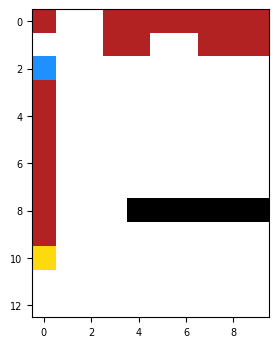

In [2]:
# Initiating the Environment. The method get_task1_gridworld
# initialises the environment for the task 1. Similarly there are methods to initialise the environment 
# for the other tasks
env1 = get_task1_gridworld()

# This is how the environment looks like
paint_gridworld(env1, figsize=(4,4), ticksize=7)

## Example of running a simulation 

In [3]:
reward_lst = []

# Initialise the environment
# An arbitary gamma value is used here. You may need to change this!
env1 = get_task1_gridworld()

# Reset the environment to start from the starting location. 
# The reset() method returns the state, reward, and whether the episode is done or not
# More information can be found under the definition of the method
_, state, reward, done = env1.reset()
reward_lst.append(reward)

# While the trial is not done, i.e. the agent has not fallen into lava,
# the maximum length of the episode has not been exceeded, and the target has not been reached
while not done:
    
    # Take a step using the step() function and passing in one of the available actions [0, 1, 2, 3] 
    # corresponding to ['N', 'S', 'E', 'W']
    # More information can be found under the definition of the method
    # In this very simple example for each step we choose a random action
    _, state, reward, done = env1.step(np.random.choice(4))
    reward_lst.append(reward)

print(f'Collected rewards of an episode: {reward_lst}')

Collected rewards of an episode: [0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

In [4]:
class Q_agent():
    def solve(self, env, n_episodes=500, gamma=0.1, alpha=0.1, epsilon=0.1):
        Q = np.zeros((env.get_state_size(), env.get_action_size()))
        total_rewards = []
        total_steps = []

        for episode in range(n_episodes):
            t, state, _, done = env.reset()
            cumulative_reward = 0
            steps = 0
            while not done:
                action = self.epsilon_greedy(Q, state, epsilon, env)  # Pass env to epsilon_greedy
                t, next_state, reward, done = env.step(action)
                best_next_action = np.argmax(Q[next_state])
                Q[state, action] += alpha * (reward + gamma * Q[next_state, best_next_action] - Q[state, action])
                state = next_state
                cumulative_reward += reward
                steps += 1

            total_rewards.append(cumulative_reward)
            total_steps.append(steps)

        policy = np.argmax(Q, axis=1)
        return policy, total_rewards, total_steps

    def epsilon_greedy(self, Q, state, epsilon, env):
        if np.random.rand() < epsilon:
            return np.random.randint(env.get_action_size())
        else:
            return np.argmax(Q[state])


In [5]:
class SARSA_agent():
    def solve(self, env, n_episodes=500, gamma=0.1, alpha=0.1, epsilon=0.1):
        Q = np.zeros((env.get_state_size(), env.get_action_size()))
        total_rewards = []
        total_steps = []

        for episode in range(n_episodes):
            t, state, _, done = env.reset()
            action = self.epsilon_greedy(Q, state, epsilon, env)  # Pass env to epsilon_greedy
            
            cumulative_reward = 0
            steps = 0
            while not done:
                t, next_state, reward, done = env.step(action)
                next_action = self.epsilon_greedy(Q, next_state, epsilon, env)  # Pass env to epsilon_greedy
                Q[state, action] += alpha * (reward + gamma * Q[next_state, next_action] - Q[state, action])
                state = next_state
                action = next_action
                cumulative_reward += reward
                steps += 1

            total_rewards.append(cumulative_reward)
            total_steps.append(steps)

        policy = np.argmax(Q, axis=1)
        return policy, total_rewards, total_steps

    def epsilon_greedy(self, Q, state, epsilon, env):
        if np.random.rand() < epsilon:
            return np.random.randint(env.get_action_size())
        else:
            return np.argmax(Q[state])


# Task 1 - Single Target, Deterministic Rewards:

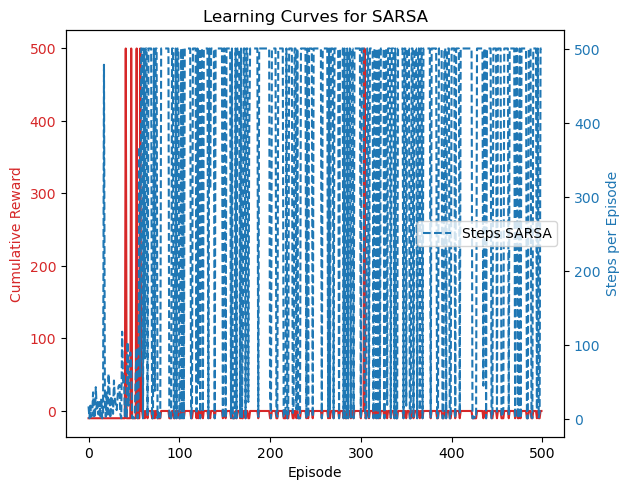

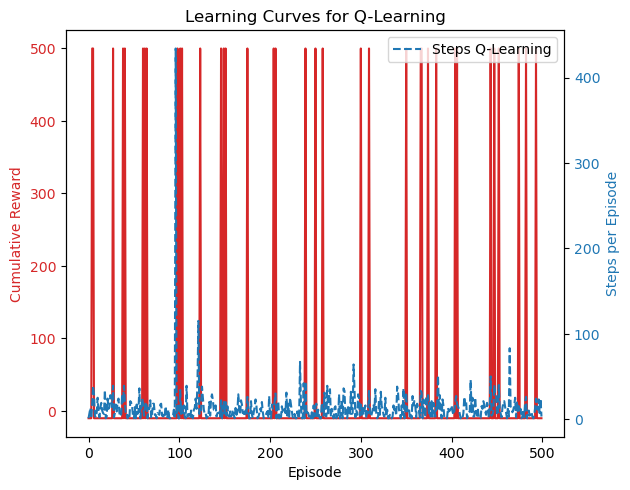

In [6]:
# Example of Hyperparameters
# This is just an example, you can add to this depending on which method you utilise

gamma = 0.3
# Alpha === Learning Rate
alpha = 0.5
epsilon = 0.6
n_episodes = 500

# This should be the definition of the gridworld for task 1. DO NOT CHANGE THIS
env1 = get_task1_gridworld()

# Example of running SARSA
agent = SARSA_agent()
policy, total_rewards, total_steps = agent.solve(env1, gamma=gamma, alpha=alpha, epsilon=epsilon, n_episodes=500)

# Example of running Q-Learning
agent = Q_agent()
policy, total_rewards, total_steps = agent.solve(env1)

# Do your plots below! Include any new function definitions in this jupyter notebook!

import numpy as np
import matplotlib.pyplot as plt
from gridworld_env import get_task1_gridworld
from utils import paint_gridworld

# Example of Hyperparameters
gamma = 0.3  # Discount factor
alpha = 0.5  # Learning rate
epsilon = 0.6  # Exploration rate
n_episodes = 500  # Number of episodes

# Initialize the environment for Task 1
env1 = get_task1_gridworld()

# Instantiate and run SARSA agent
sarsa_agent = SARSA_agent()
sarsa_policy, sarsa_rewards, sarsa_steps = sarsa_agent.solve(env1, n_episodes, gamma, alpha, epsilon)

# Instantiate and run Q-Learning agent
q_learning_agent = Q_agent()
q_learning_policy, q_learning_rewards, q_learning_steps = q_learning_agent.solve(env1, n_episodes, gamma, alpha, epsilon)

# Plotting the results
def plot_learning_curves(rewards, steps, label):
    episodes = np.arange(len(rewards))
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Episode')
    ax1.set_ylabel('Cumulative Reward', color=color)
    ax1.plot(episodes, rewards, color=color, label=f'Reward {label}')
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    color = 'tab:blue'
    ax2.set_ylabel('Steps per Episode', color=color)  # we already handled the x-label with ax1
    ax2.plot(episodes, steps, color=color, linestyle='--', label=f'Steps {label}')
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.title(f'Learning Curves for {label}')
    plt.legend()
    plt.show()

# Plotting for SARSA
plot_learning_curves(sarsa_rewards, sarsa_steps, 'SARSA')

# Plotting for Q-Learning
plot_learning_curves(q_learning_rewards, q_learning_steps, 'Q-Learning')

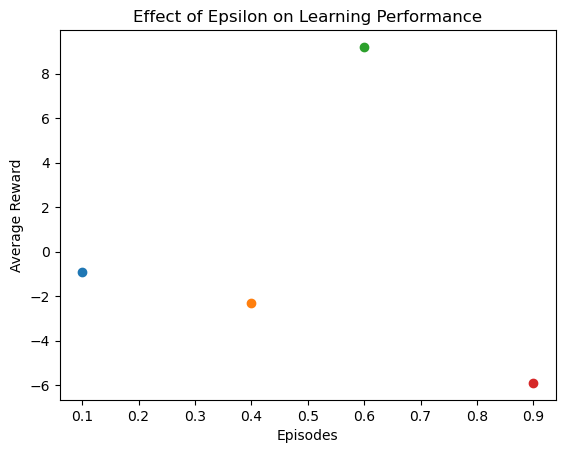

In [9]:
epsilons = [0.1, 0.4, 0.6, 0.9]
results = {}

for eps in epsilons:
    agent = SARSA_agent()
    _, rewards, _ = agent.solve(env1, n_episodes, gamma, alpha, eps)
    # results[f'epsilon={eps}'] = np.mean(rewards, axis=0)
    results[eps] = np.mean(rewards, axis=0)

fig, ax = plt.subplots()
for key, val in results.items():
    ax.scatter(key,val)
ax.set_title('Effect of Epsilon on Learning Performance')
ax.set_xlabel('Episodes')
ax.set_ylabel('Average Reward')
# ax.legend()
plt.show()


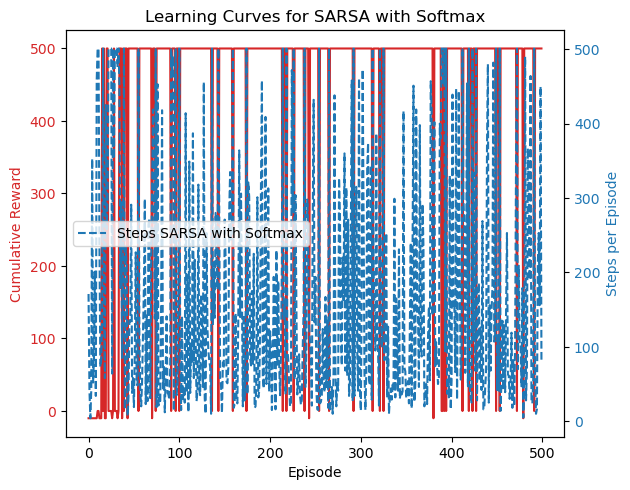

In [10]:
import numpy as np

def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / exp_x.sum(axis=0, keepdims=True)

class SARSA_agent_softmax(SARSA_agent):
    def epsilon_greedy(self, Q, state, epsilon, env):
        probs = softmax(Q[state])
        return np.random.choice(np.arange(env.get_action_size()), p=probs)

# Run with Softmax
softmax_agent = SARSA_agent_softmax()
softmax_policy, softmax_rewards, softmax_steps = softmax_agent.solve(env1, n_episodes, gamma, alpha, epsilon)

# Compare and plot results
plot_learning_curves(softmax_rewards, softmax_steps, 'SARSA with Softmax')


# Task 2 - Dual Targets with Stochastic Rewards

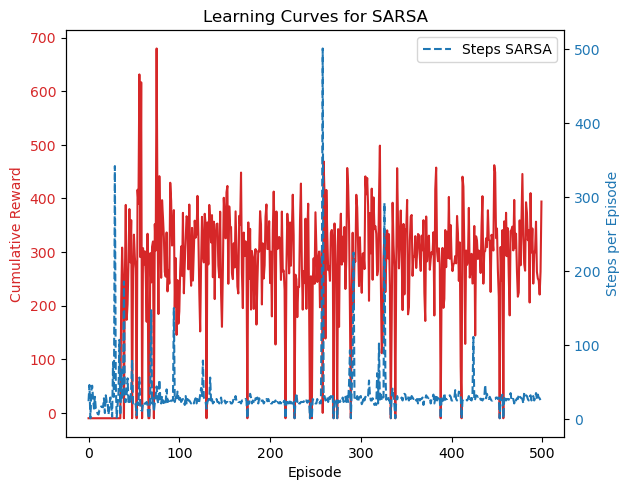

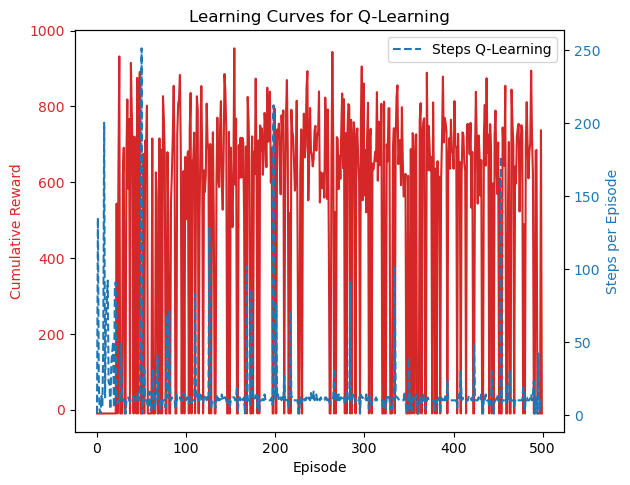

In [11]:
# This should be the definition of the gridworld for task 1. DO NOT CHANGE THIS
env2 = get_task2_gridworld()

# Example of running SARSA
agent = SARSA_agent()
policy, total_rewards, total_steps = agent.solve(env2)

# Example of running Q-Learning
agent = Q_agent()
policy, total_rewards, total_steps = agent.solve(env2)

# Do your plots below! Include any new function definitions in this jupyter notebook!

import numpy as np
import matplotlib.pyplot as plt
from gridworld_env import get_task2_gridworld  # Make sure you have the appropriate function in your gridworld_env module
from utils import paint_gridworld

# Initialize the environment for Task 2 with Dual Targets and Stochastic Rewards
env2 = get_task2_gridworld()

class SARSA_agent():
    def solve(self, env, n_episodes=500, gamma=0.1, alpha=0.1, epsilon=0.1):
        Q = np.zeros((env.get_state_size(), env.get_action_size()))
        total_rewards = []
        total_steps = []

        for episode in range(n_episodes):
            t, state, _, done = env.reset()
            action = self.epsilon_greedy(Q, state, epsilon, env)
            
            cumulative_reward = 0
            steps = 0
            while not done:
                t, next_state, reward, done = env.step(action)
                next_action = self.epsilon_greedy(Q, next_state, epsilon, env)
                Q[state, action] += alpha * (reward + gamma * Q[next_state, next_action] - Q[state, action])
                state = next_state
                action = next_action
                cumulative_reward += reward
                steps += 1

            total_rewards.append(cumulative_reward)
            total_steps.append(steps)

        policy = np.argmax(Q, axis=1)
        return policy, total_rewards, total_steps

    def epsilon_greedy(self, Q, state, epsilon, env):
        if np.random.rand() < epsilon:
            return np.random.randint(env.get_action_size())
        else:
            return np.argmax(Q[state])

class Q_agent():
    def solve(self, env, n_episodes=500, gamma=0.1, alpha=0.1, epsilon=0.1):
        Q = np.zeros((env.get_state_size(), env.get_action_size()))
        total_rewards = []
        total_steps = []

        for episode in range(n_episodes):
            t, state, _, done = env.reset()
            cumulative_reward = 0
            steps = 0
            while not done:
                action = self.epsilon_greedy(Q, state, epsilon, env)
                t, next_state, reward, done = env.step(action)
                best_next_action = np.argmax(Q[next_state])
                Q[state, action] += alpha * (reward + gamma * Q[next_state, best_next_action] - Q[state, action])
                state = next_state
                cumulative_reward += reward
                steps += 1

            total_rewards.append(cumulative_reward)
            total_steps.append(steps)

        policy = np.argmax(Q, axis=1)
        return policy, total_rewards, total_steps

    def epsilon_greedy(self, Q, state, epsilon, env):
        if np.random.rand() < epsilon:
            return np.random.randint(env.get_action_size())
        else:
            return np.argmax(Q[state])

# Running SARSA
sarsa_agent = SARSA_agent()
sarsa_policy, sarsa_rewards, sarsa_steps = sarsa_agent.solve(env2)

# Running Q-Learning
q_learning_agent = Q_agent()
q_learning_policy, q_learning_rewards, q_learning_steps = q_learning_agent.solve(env2)

# Function to plot learning curves
def plot_learning_curves(rewards, steps, label):
    episodes = np.arange(len(rewards))
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Episode')
    ax1.set_ylabel('Cumulative Reward', color=color)
    ax1.plot(episodes, rewards, color=color, label=f'Reward {label}')
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Steps per Episode', color=color)
    ax2.plot(episodes, steps, color=color, linestyle='--', label=f'Steps {label}')
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()
    plt.title(f'Learning Curves for {label}')
    plt.legend()
    plt.show()

# Plotting for SARSA
plot_learning_curves(sarsa_rewards, sarsa_steps, 'SARSA')

# Plotting for Q-Learning
plot_learning_curves(q_learning_rewards, q_learning_steps, 'Q-Learning')


# Task 3 - Stochastic Transitions and Rewards

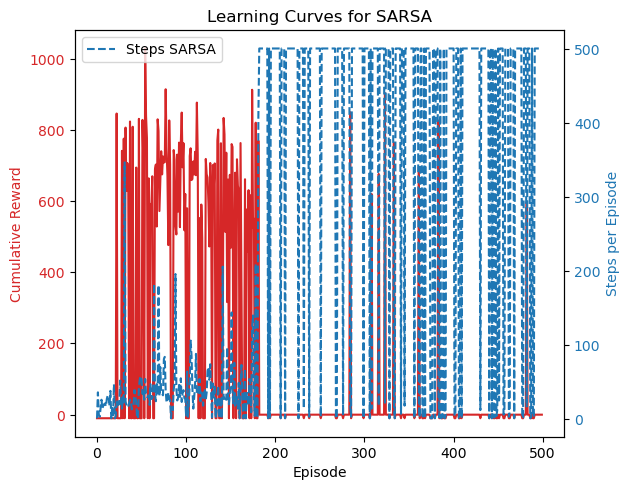

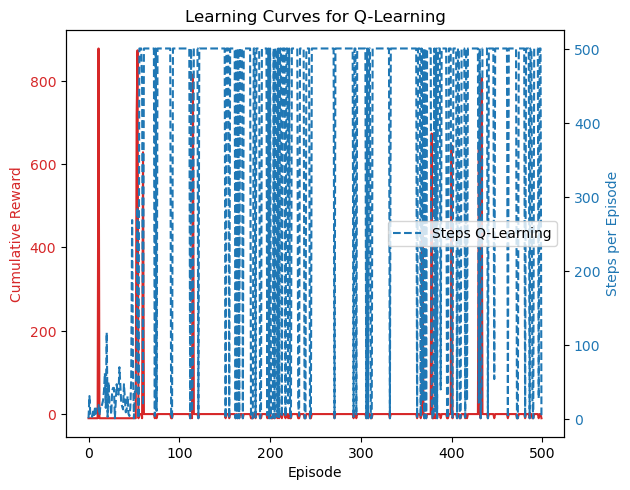

In [12]:
# This should be the definition of the gridworld for task 1. DO NOT CHANGE THIS
env3 = get_task3_gridworld()

# Example of running SARSA
agent = SARSA_agent()
policy, total_rewards, total_steps = agent.solve(env3)

# Example of running Q-Learning
agent = Q_agent()
policy, total_rewards, total_steps = agent.solve(env3)

# Do your plots below! Include any new function definitions in this jupyter notebook!

import numpy as np
import matplotlib.pyplot as plt
from gridworld_env import get_task3_gridworld  # Make sure you have the appropriate function in your gridworld_env module
from utils import paint_gridworld

# Initialize the environment for Task 3 with Stochastic Transitions and Rewards
env3 = get_task3_gridworld()

class SARSA_agent():
    def solve(self, env, n_episodes=500, gamma=0.1, alpha=0.1, epsilon=0.1):
        Q = np.zeros((env.get_state_size(), env.get_action_size()))
        total_rewards = []
        total_steps = []

        for episode in range(n_episodes):
            t, state, _, done = env.reset()
            action = self.epsilon_greedy(Q, state, epsilon, env)
            
            cumulative_reward = 0
            steps = 0
            while not done:
                t, next_state, reward, done = env.step(action)
                next_action = self.epsilon_greedy(Q, next_state, epsilon, env)
                Q[state, action] += alpha * (reward + gamma * Q[next_state, next_action] - Q[state, action])
                state = next_state
                action = next_action
                cumulative_reward += reward
                steps += 1

            total_rewards.append(cumulative_reward)
            total_steps.append(steps)

        policy = np.argmax(Q, axis=1)
        return policy, total_rewards, total_steps

    def epsilon_greedy(self, Q, state, epsilon, env):
        if np.random.rand() < epsilon:
            return np.random.randint(env.get_action_size())
        else:
            return np.argmax(Q[state])

class Q_agent():
    def solve(self, env, n_episodes=500, gamma=0.1, alpha=0.1, epsilon=0.1):
        Q = np.zeros((env.get_state_size(), env.get_action_size()))
        total_rewards = []
        total_steps = []

        for episode in range(n_episodes):
            t, state, _, done = env.reset()
            cumulative_reward = 0
            steps = 0
            while not done:
                action = self.epsilon_greedy(Q, state, epsilon, env)
                t, next_state, reward, done = env.step(action)
                best_next_action = np.argmax(Q[next_state])
                Q[state, action] += alpha * (reward + gamma * Q[next_state, best_next_action] - Q[state, action])
                state = next_state
                cumulative_reward += reward
                steps += 1

            total_rewards.append(cumulative_reward)
            total_steps.append(steps)

        policy = np.argmax(Q, axis=1)
        return policy, total_rewards, total_steps

    def epsilon_greedy(self, Q, state, epsilon, env):
        if np.random.rand() < epsilon:
            return np.random.randint(env.get_action_size())
        else:
            return np.argmax(Q[state])

# Running SARSA
sarsa_agent = SARSA_agent()
sarsa_policy, sarsa_rewards, sarsa_steps = sarsa_agent.solve(env3)

# Running Q-Learning
q_learning_agent = Q_agent()
q_learning_policy, q_learning_rewards, q_learning_steps = q_learning_agent.solve(env3)

# Function to plot learning curves
def plot_learning_curves(rewards, steps, label):
    episodes = np.arange(len(rewards))
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Episode')
    ax1.set_ylabel('Cumulative Reward', color=color)
    ax1.plot(episodes, rewards, color=color, label=f'Reward {label}')
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis
    color = 'tab:blue'
    ax2.set_ylabel('Steps per Episode', color=color)
    ax2.plot(episodes, steps, color=color, linestyle='--', label=f'Steps {label}')
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # Otherwise the right y-label is slightly clipped
    plt.title(f'Learning Curves for {label}')
    plt.legend()
    plt.show()

# Plotting for SARSA
plot_learning_curves(sarsa_rewards, sarsa_steps, 'SARSA')

# Plotting for Q-Learning
plot_learning_curves(q_learning_rewards, q_learning_steps, 'Q-Learning')


In [13]:
# Parameter grid
alphas = [0.1, 0.5, 0.9]
gammas = [0.1, 0.5, 0.9]
epsilons = [0.1, 0.3, 0.5]

# Store results
optimization_results = {}

for alpha in alphas:
    for gamma in gammas:
        for epsilon in epsilons:
            q_agent = Q_agent()
            _, total_rewards, _ = q_agent.solve(env3, n_episodes=100, gamma=gamma, alpha=alpha, epsilon=epsilon)
            avg_reward = np.mean(total_rewards)
            optimization_results[(alpha, gamma, epsilon)] = avg_reward

# Finding the best parameters
best_params = max(optimization_results, key=optimization_results.get)
best_reward = optimization_results[best_params]

print("Best Parameters:", best_params)
print("Best Average Reward:", best_reward)


Best Parameters: (0.5, 0.5, 0.1)
Best Average Reward: 308.3204734749406


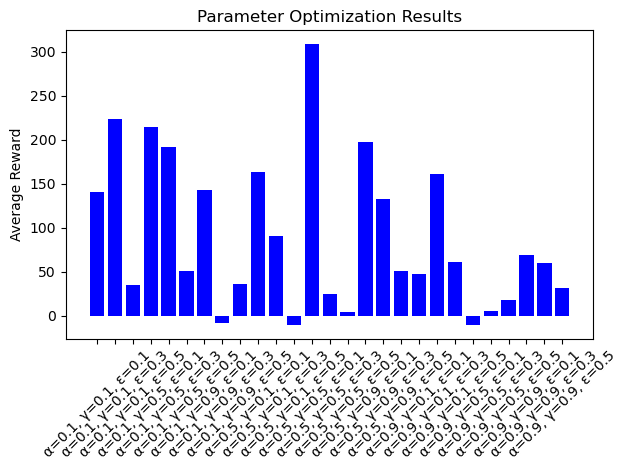

In [14]:
# Visualization of parameter impact
fig, ax = plt.subplots()
labels = [f'α={a}, γ={g}, ε={e}' for (a, g, e) in optimization_results.keys()]
ax.bar(labels, optimization_results.values(), color='blue')
plt.xticks(rotation=45)
plt.ylabel('Average Reward')
plt.title('Parameter Optimization Results')
plt.tight_layout()
plt.show()
